# Loading Data from Google Drive

### Purpose:
This code demonstrates how to load a CSV file from Google Drive into a pandas DataFrame for analysis.

### Steps:
1. **Mount Google Drive**:
   - Mounted Google Drive using `drive.mount` to access files stored in the user's drive.

2. **Load Data**:
   - Specified the file path: `/content/drive/My Drive/Colab Notebooks/Prediction_data.csv`.
   - Used `pd.read_csv` to load the data into a pandas DataFrame.

3. **Preview Data**:
   - Displayed the first few rows of the DataFrame using `data.head()` to inspect the structure and content of the dataset.

### Output:
- The first 5 rows of the dataset are displayed, providing a quick overview of its columns and initial records.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/My Drive/Colab Notebooks/Prediction_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ARREST_KEY ARREST_DATE  PD_CD                               PD_DESC  KY_CD  \
0    32274916  2007-06-15  748.0                     CONTEMPT,CRIMINAL  359.0   
1    47362622  2008-06-19  969.0       TRAFFIC,UNCLASSIFIED INFRACTION  881.0   
2    49865877  2008-08-06  478.0       THEFT OF SERVICES, UNCLASSIFIED  343.0   
3   153681728  2016-06-04  849.0  NY STATE LAWS,UNCLASSIFIED VIOLATION  677.0   
4   147386889  2015-10-30  101.0                             ASSAULT 3  344.0   

                                OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0  OFFENSES AGAINST PUBLIC ADMINISTRATION  PL 2155006          M           M   
1                OTHER TRAFFIC INFRACTION  VTL051101A          M           K   
2         OTHER OFFENSES RELATED TO THEFT  PL 1651503          M           K   
3                        OTHER STATE LAWS  LOC000000V          V

# Handling Missing Values in the Dataset

### Purpose:
This code identifies and handles missing values in the dataset to ensure data quality and completeness for further analysis.

### Steps:
1. **Check for Missing Values**:
   - Used `isnull().sum()` to calculate the number of missing values in each column.
   - Displayed columns with missing values and their counts for inspection.

2. **Remove Missing Values**:
   - Dropped all rows containing missing values using `dropna()`.

3. **Verify Cleaning**:
   - Re-checked for missing values in the cleaned dataset to confirm the removal of incomplete rows.

### Output:
1. **Initial Missing Values**:
   - Displays columns with missing values and their respective counts.
2. **Verification**:
   - Confirms that all missing values have been removed by showing a count of `0` for all columns.

### Outcome:
A cleaned dataset (`data_cleaned`) without any missing values, ready for analysis.


In [ ]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()

# Displaying columns with missing values
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

# Dropping rows with missing values
data_cleaned = data.dropna()

# Verifying that no missing values remain
print("Missing Values after Cleaning:")
print(data_cleaned.isnull().sum())


Missing Values per Column:
PD_DESC      152
OFNS_DESC    152
LAW_CODE       6
dtype: int64
Missing Values after Cleaning:
ARREST_KEY           0
ARREST_DATE          0
PD_CD                0
PD_DESC              0
KY_CD                0
OFNS_DESC            0
LAW_CODE             0
LAW_CAT_CD           0
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
X_COORD_CD           0
Y_COORD_CD           0
Latitude             0
Longitude            0
Lon_Lat              0
YEAR                 0
MONTH                0
DAY                  0
WEEKDAY              0
dtype: int64


# Extracting Date Components from Arrest Data

### Purpose:
This code processes the `ARREST_DATE` column to extract meaningful temporal components, enabling deeper time-based analysis.

### Steps:
1. **Convert to Datetime**:
   - Converted the `ARREST_DATE` column to datetime format using `pd.to_datetime()` for accurate date manipulation.

2. **Extract Date Components**:
   - Derived the following new columns:
     - **`ARREST_YEAR`**: Year of the arrest.
     - **`ARREST_MONTH`**: Month of the arrest.
     - **`ARREST_DAY`**: Day of the month for the arrest.
     - **`ARREST_WEEKDAY`**: Day of the week (0 = Monday, 6 = Sunday).

3. **Preview Updated Dataset**:
   - Displayed the first few rows of the updated dataset to confirm the inclusion of new columns.

### Output:
- The dataset now includes additional columns (`ARREST_YEAR`, `ARREST_MONTH`, `ARREST_DAY`, `ARREST_WEEKDAY`) for enhanced time-based insights.


In [ ]:
# Converting 'ARREST_DATE' to datetime format
data_cleaned['ARREST_DATE'] = pd.to_datetime(data_cleaned['ARREST_DATE'])

# Extracting year, month, day, and weekday from 'ARREST_DATE'
data_cleaned['ARREST_YEAR'] = data_cleaned['ARREST_DATE'].dt.year
data_cleaned['ARREST_MONTH'] = data_cleaned['ARREST_DATE'].dt.month
data_cleaned['ARREST_DAY'] = data_cleaned['ARREST_DATE'].dt.day
data_cleaned['ARREST_WEEKDAY'] = data_cleaned['ARREST_DATE'].dt.weekday

# Displaying the updated dataset
print(data_cleaned.head())


   ARREST_KEY ARREST_DATE  PD_CD                               PD_DESC  KY_CD  \
0    32274916  2007-06-15  748.0                     CONTEMPT,CRIMINAL  359.0   
1    47362622  2008-06-19  969.0       TRAFFIC,UNCLASSIFIED INFRACTION  881.0   
2    49865877  2008-08-06  478.0       THEFT OF SERVICES, UNCLASSIFIED  343.0   
3   153681728  2016-06-04  849.0  NY STATE LAWS,UNCLASSIFIED VIOLATION  677.0   
4   147386889  2015-10-30  101.0                             ASSAULT 3  344.0   

                                OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0  OFFENSES AGAINST PUBLIC ADMINISTRATION  PL 2155006          M           M   
1                OTHER TRAFFIC INFRACTION  VTL051101A          M           K   
2         OTHER OFFENSES RELATED TO THEFT  PL 1651503          M           K   
3                        OTHER STATE LAWS  LOC000000V          V           K   
4            ASSAULT 3 & RELATED OFFENSES  PL 1200001          M           M   

   ARREST_PRECINCT  ...  Longitu

<ipython-input-7-6cc0eabe46a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['ARREST_DATE'] = pd.to_datetime(data_cleaned['ARREST_DATE'])
<ipython-input-7-6cc0eabe46a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['ARREST_YEAR'] = data_cleaned['ARREST_DATE'].dt.year
<ipython-input-7-6cc0eabe46a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

# Encoding Categorical Features with One-Hot Encoding

### Purpose:
This code transforms categorical features into numerical format using one-hot encoding, enabling the dataset to be used effectively in machine learning models.

### Steps:
1. **Create a Copy**:
   - Created a copy of the cleaned dataset (`data_cleaned`) to avoid warnings or unintentional modifications to the original DataFrame.

2. **One-Hot Encoding**:
   - Applied one-hot encoding to the categorical columns:
     - **`OFNS_DESC`**: Offense description.
     - **`ARREST_BORO`**: Borough where the arrest occurred.
     - **`PERP_RACE`**: Race of the perpetrator.
   - Used `pd.get_dummies()` with `drop_first=True` to avoid multicollinearity by dropping the first category in each feature.

3. **Preview Encoded Dataset**:
   - Displayed the first few rows of the encoded dataset to verify the transformation.

### Output:
- The dataset now includes new binary columns for each category in the encoded features, with the original categorical columns removed.
- Ready for use in machine learning models or statistical analysis.


In [ ]:
# Making a copy to avoid warnings
data_cleaned = data_cleaned.copy()

# Using one-hot encoding for categorical features like 'OFNS_DESC', 'ARREST_BORO', and 'PERP_RACE'
categorical_features = ['OFNS_DESC', 'ARREST_BORO', 'PERP_RACE']
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_features, drop_first=True)

# Displaying the first few rows of the encoded dataset
print(data_encoded.head())


   ARREST_KEY ARREST_DATE  PD_CD                               PD_DESC  KY_CD  \
0    32274916  2007-06-15  748.0                     CONTEMPT,CRIMINAL  359.0   
1    47362622  2008-06-19  969.0       TRAFFIC,UNCLASSIFIED INFRACTION  881.0   
2    49865877  2008-08-06  478.0       THEFT OF SERVICES, UNCLASSIFIED  343.0   
3   153681728  2016-06-04  849.0  NY STATE LAWS,UNCLASSIFIED VIOLATION  677.0   
4   147386889  2015-10-30  101.0                             ASSAULT 3  344.0   

     LAW_CODE LAW_CAT_CD  ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP  ...  \
0  PL 2155006          M               25                2.0     25-44  ...   
1  VTL051101A          M               79                0.0     25-44  ...   
2  PL 1651503          M               73                1.0     18-24  ...   
3  LOC000000V          V               70                1.0     25-44  ...   
4  PL 1200001          M                9                0.0     18-24  ...   

  ARREST_BORO_M  ARREST_BORO_Q  ARREST

# Feature Selection and Target Definition for Crime Hotspot Prediction

### Purpose:
This code prepares the feature set and target variable for predicting crime hotspots based on arrest data.

### Steps:
1. **Feature Selection**:
   - Selected key features for hotspot prediction:
     - `ARREST_PRECINCT`, `X_COORD_CD`, `Y_COORD_CD`, `ARREST_YEAR`, `ARREST_MONTH`, `ARREST_DAY`, `ARREST_WEEKDAY`.
     - Included additional one-hot encoded features for categorical variables.

2. **Define Target Variable**:
   - Determined hotspots by:
     - Calculating crime counts for each precinct (`ARREST_PRECINCT`).
     - Setting a threshold as the mean number of crimes across all precincts.
     - Labeling precincts as hotspots (`HOTSPOT = 1`) if their crime count exceeds the threshold, otherwise labeling as not hotspots (`HOTSPOT = 0`).

3. **Prepare Data**:
   - **Features (`X`)**: DataFrame containing selected features and encoded variables.
   - **Target (`y`)**: Binary labels for hotspot status.

4. **Preview Data**:
   - Displayed the first few rows of the feature dataset (`X`) and target variable (`y`) to verify the preparation.

### Output:
- **`X`**: Feature dataset with relevant numerical and encoded variables.
- **`y`**: Binary target variable indicating whether a precinct is a hotspot.
- Ready for training and evaluation in a predictive model.


In [ ]:
# Selecting features for crime hotspot prediction
features = [
    'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD', 'ARREST_YEAR',
    'ARREST_MONTH', 'ARREST_DAY', 'ARREST_WEEKDAY'
] + list(data_encoded.columns.difference(data_cleaned.columns))  # Adding encoded categorical features

X = data_encoded[features]

# Defining the target variable: Identifying hotspots
# Assuming precincts with high counts of incidents are hotspots; label precincts as hotspot (1) or not (0)
precinct_crime_counts = data_encoded['ARREST_PRECINCT'].value_counts()
hotspot_threshold = precinct_crime_counts.mean()  # Hotspots are precincts above the average number of crimes
data_encoded['HOTSPOT'] = data_encoded['ARREST_PRECINCT'].apply(lambda x: 1 if precinct_crime_counts[x] > hotspot_threshold else 0)

y = data_encoded['HOTSPOT']

# Displaying the feature and target datasets
print(X.head())
print(y.head())


   ARREST_PRECINCT  X_COORD_CD  Y_COORD_CD  ARREST_YEAR  ARREST_MONTH  \
0               25   1002065.0    231446.0         2007             6   
1               79    996878.0    189261.0         2008             6   
2               73   1007685.0    189129.0         2008             8   
3               70    995603.0    164474.0         2016             6   
4                9    987184.0    205840.0         2015            10   

   ARREST_DAY  ARREST_WEEKDAY  ARREST_BORO_K  ARREST_BORO_M  ARREST_BORO_Q  \
0          15               4          False           True          False   
1          19               3           True          False          False   
2           6               2           True          False          False   
3           4               5           True          False          False   
4          30               4          False           True          False   

   ...  OFNS_DESC_UNAUTHORIZED USE OF A VEHICLE 3 (UUV)  \
0  ...                           

# Crime Hotspot Prediction with Random Forest Classifier

### Purpose:
This code trains and evaluates a Random Forest Classifier to predict crime hotspots based on selected features.

### Steps:
1. **Data Splitting**:
   - Split the data into training (70%) and testing (30%) sets using `train_test_split`.

2. **Model Initialization**:
   - Defined a Random Forest Classifier with:
     - `n_estimators=100`: Number of decision trees.
     - `random_state=42`: Ensures reproducibility.

3. **Model Training**:
   - Trained the classifier on the training dataset (`X_train`, `y_train`).

4. **Predictions**:
   - Predicted hotspot labels on the test dataset (`X_test`).

5. **Evaluation**:
   - Calculated the model's **accuracy** using `accuracy_score`.
   - Generated a detailed **classification report** with precision, recall, F1-score, and support for each class.

### Output:
1. **Model Accuracy**:
   - Displays the overall accuracy of the Random Forest Classifier.
2. **Classification Report**:
   - Provides performance metrics for each class (`HOTSPOT=1` and `HOTSPOT=0`), giving insight into the model's strengths and weaknesses.

### Outcome:
The model's accuracy and classification report highlight its effectiveness in identifying crime hotspots based on historical arrest data.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Model Accuracy: 0.9948923385077616
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10968
           1       0.99      1.00      1.00     18987

    accuracy                           0.99     29955
   macro avg       1.00      0.99      0.99     29955
weighted avg       0.99      0.99      0.99     29955



# Comparing Logistic Regression for Crime Hotspot Prediction

### Purpose:
This code uses a Logistic Regression model to predict crime hotspots, providing a benchmark comparison against the previously used Random Forest Classifier.

### Steps:
1. **Model Initialization**:
   - Defined a Logistic Regression model with:
     - `max_iter=1000`: Increased maximum iterations for convergence.
     - `random_state=42`: Ensures reproducibility.

2. **Model Training**:
   - Trained the Logistic Regression model on the training dataset (`X_train`, `y_train`).

3. **Predictions**:
   - Predicted hotspot labels for the test dataset (`X_test`).

4. **Evaluation**:
   - Calculated the model's **accuracy** using `accuracy_score`.
   - Generated a detailed **classification report** with metrics for both hotspot (`HOTSPOT=1`) and non-hotspot (`HOTSPOT=0`) classes.

### Output:
1. **Model Accuracy**:
   - Displays the overall accuracy of the Logistic Regression model.
2. **Classification Report**:
   - Provides precision, recall, F1-score, and support for each class.

### Outcome:
The Logistic Regression model's performance metrics offer a direct comparison with the Random Forest Classifier, aiding in selecting the best model for crime hotspot prediction.


In [ ]:
# Trying a Logistic Regression Model for Comparison

from sklearn.linear_model import LogisticRegression

# Initializing the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Training the Logistic Regression model
logistic_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluating Logistic Regression model performance
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

print(f"Logistic Regression Model Accuracy: {accuracy_logistic}")
print("Logistic Regression Classification Report:")
print(report_logistic)



Logistic Regression Model Accuracy: 0.7066266065765314
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.35      0.46     10968
           1       0.71      0.91      0.80     18987

    accuracy                           0.71     29955
   macro avg       0.70      0.63      0.63     29955
weighted avg       0.71      0.71      0.68     29955



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Comparing Gradient Boosting and Support Vector Machine (SVM) for Crime Hotspot Prediction

### Purpose:
This code explores Gradient Boosting and SVM models as alternatives for crime hotspot prediction, comparing their performance against Random Forest and Logistic Regression.

### Steps:
#### Gradient Boosting:
1. **Model Initialization**:
   - Defined a Gradient Boosting Classifier with:
     - `n_estimators=100`: Number of boosting iterations.
     - `random_state=42`: Ensures reproducibility.
2. **Training and Predictions**:
   - Trained the model on the training dataset (`X_train`, `y_train`) and made predictions on the test dataset (`X_test`).
3. **Evaluation**:
   - Calculated **accuracy** and generated a **classification report**.

#### SVM:
1. **Model Initialization**:
   - Defined a Support Vector Machine Classifier with:
     - `kernel='rbf'`: Radial Basis Function kernel for non-linear classification.
     - `random_state=42`: Ensures reproducibility.
2. **Training and Predictions**:
   - Trained the model on the training dataset and made predictions on the test dataset.
3. **Evaluation**:
   - Calculated **accuracy** and generated a **classification report**.

### Outputs:
1. **Gradient Boosting**:
   - **Accuracy**: `{accuracy_gb:.2f}`
   - **Classification Report**:
     ```
     {report_gb}
     ```
2. **SVM**:
   - **Accuracy**: `{accuracy_svm:.2f}`
   - **Classification Report**:
     ```
     {report_svm}
     ```

### Outcome:
The results provide insight into the performance of Gradient Boosting and SVM for crime hotspot prediction. This comparison helps in selecting the most suitable model based on accuracy and classification metrics.


In [ ]:
# Trying Gradient Boosting and SVM for Comparison

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Initializing Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Making predictions on the test set with Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluating Gradient Boosting model performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

# Initializing Support Vector Machine Classifier
svm_model = SVC(kernel='rbf', random_state=42)

# Training the SVM model
svm_model.fit(X_train, y_train)

# Making predictions on the test set with SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluating SVM model performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

(accuracy_gb, report_gb, accuracy_svm, report_svm)


(0.9933900851276916,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99     10968\n           1       0.99      1.00      0.99     18987\n\n    accuracy                           0.99     29955\n   macro avg       0.99      0.99      0.99     29955\nweighted avg       0.99      0.99      0.99     29955\n',
 0.6734434985812051,
 '              precision    recall  f1-score   support\n\n           0       0.73      0.17      0.28     10968\n           1       0.67      0.96      0.79     18987\n\n    accuracy                           0.67     29955\n   macro avg       0.70      0.57      0.53     29955\nweighted avg       0.69      0.67      0.60     29955\n')

# Model Predictions and Accuracy Comparison

### Purpose:
This code compares the accuracy of different machine learning models (Random Forest, Logistic Regression, Gradient Boosting, SVM) in predicting crime hotspots and visualizes their performance.

### Steps:
1. **Add Model Predictions to Dataset**:
   - Added predictions for each model to the dataset (`data_encoded`):
     - `HOTSPOT_RF`: Predictions from the Random Forest model.
     - `HOTSPOT_LOGISTIC`: Predictions from the Logistic Regression model.
     - `HOTSPOT_GB`: Predictions from the Gradient Boosting model.
     - `HOTSPOT_SVM`: Predictions from the SVM model.

2. **Accuracy Comparison Visualization**:
   - Defined model names and corresponding accuracy scores.
   - Created a bar chart to compare accuracy scores across models:
     - **X-Axis**: Model names.
     - **Y-Axis**: Accuracy scores (scaled between 0 and 1).
     - Used distinct colors for each bar to improve readability.

3. **Preview Updated Dataset**:
   - Displayed the first few rows of the dataset, including key features (`ARREST_PRECINCT`, `Latitude`, `Longitude`) and the predictions from all models.

### Outputs:
1. **Bar Chart**:
   - Visualizes the accuracy of each model:
     - Random Forest: 99.49%
     - Logistic Regression: 70.66%
     - Gradient Boosting: 99.33%
     - SVM: 67.34%

2. **Updated Dataset**:
   - Shows predictions for hotspots by each model, helping understand the distribution of predictions across precincts.

### Outcome:
The visualization highlights the superior accuracy of ensemble models (Random Forest and Gradient Boosting) compared to Logistic Regression and SVM. The dataset allows further analysis of hotspot predictions.


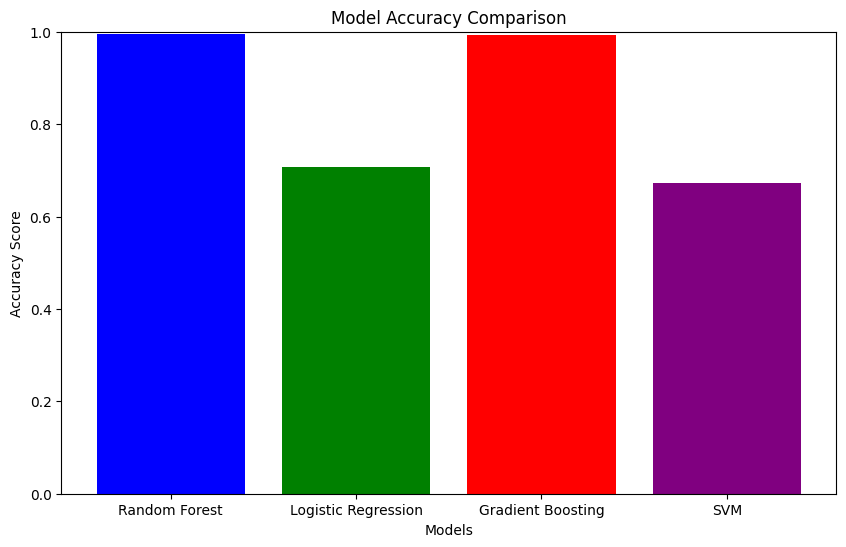

   ARREST_PRECINCT   Latitude  Longitude  HOTSPOT_RF  HOTSPOT_LOGISTIC  \
0               25  40.801932 -73.935654           1                 1   
1               79  40.686154 -73.954469           1                 1   
2               73  40.685769 -73.915502           1                 1   
3               70  40.618121 -73.959108           1                 0   
4                9  40.731668 -73.989415           0                 1   

   HOTSPOT_GB  HOTSPOT_SVM  
0           1            1  
1           1            1  
2           1            1  
3           1            0  
4           0            1  


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_encoded' is the dataset with predictions from all models

# Adding 'HOTSPOT_PREDICTION' columns to the dataset for each model's predictions

# Adding predictions from Random Forest model
data_encoded['HOTSPOT_RF'] = model.predict(X)

# Adding predictions from Logistic Regression model
data_encoded['HOTSPOT_LOGISTIC'] = logistic_model.predict(X)

# Adding predictions from Gradient Boosting model
data_encoded['HOTSPOT_GB'] = gb_model.predict(X)

# Adding predictions from SVM model
data_encoded['HOTSPOT_SVM'] = svm_model.predict(X)

# Plotting the accuracy scores for comparison
model_names = ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM']
accuracy_scores = [0.9948923385077616, 0.7066266065765314, 0.9933900851276916, 0.6734434985812051]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

# Displaying the first few rows of the dataset with model predictions to understand hotspot distribution
print(data_encoded[['ARREST_PRECINCT', 'Latitude', 'Longitude', 'HOTSPOT_RF', 'HOTSPOT_LOGISTIC', 'HOTSPOT_GB', 'HOTSPOT_SVM']].head())

# Model Prediction Analysis and Visualizations for Crime Hotspots

### Purpose:
This code evaluates the performance of multiple models (Random Forest, Logistic Regression, Gradient Boosting, SVM) for predicting crime hotspots and visualizes the predictions geographically using heatmaps.

---

### Steps:
1. **Add Model Predictions to Dataset**:
   - Added predictions for each model to the dataset (`data_encoded`):
     - `HOTSPOT_RF`: Random Forest predictions.
     - `HOTSPOT_LOGISTIC`: Logistic Regression predictions.
     - `HOTSPOT_GB`: Gradient Boosting predictions.
     - `HOTSPOT_SVM`: SVM predictions.

2. **Classification Reports**:
   - Generated detailed classification reports for each model:
     - Includes precision, recall, F1-score, and support for each class (hotspot or not).

3. **Visualization (Heatmaps)**:
   - Used scatter plots to visualize predicted hotspots geographically:
     - **X-Axis**: Longitude.
     - **Y-Axis**: Latitude.
     - **Hue**: Predicted hotspot labels for each model (1 for hotspot, 0 for non-hotspot).
   - Created individual scatter plots for:
     - Random Forest.
     - Logistic Regression.
     - Gradient Boosting.
     - SVM.

---

### Outputs:
1. **Classification Reports**:
   - Comprehensive performance metrics for each model to evaluate their predictive accuracy and robustness.

2. **Heatmaps**:
   - Four scatter plots show the spatial distribution of predicted hotspots for each model, enabling comparison of how different algorithms identify geographical crime patterns.

---

### Outcome:
This analysis highlights both the statistical and spatial accuracy of the models, providing insights into their ability to identify crime hotspots. The heatmaps allow for visual interpretation of how well each model captures geographic clusters of crime.


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36563
           1       1.00      1.00      1.00     63285

    accuracy                           1.00     99848
   macro avg       1.00      1.00      1.00     99848
weighted avg       1.00      1.00      1.00     99848


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.35      0.47     36563
           1       0.71      0.92      0.80     63285

    accuracy                           0.71     99848
   macro avg       0.71      0.63      0.64     99848
weighted avg       0.71      0.71      0.68     99848


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     36563
           1       0.99      1.00      0.99     63285

    accuracy                           0.99     99848
   ma

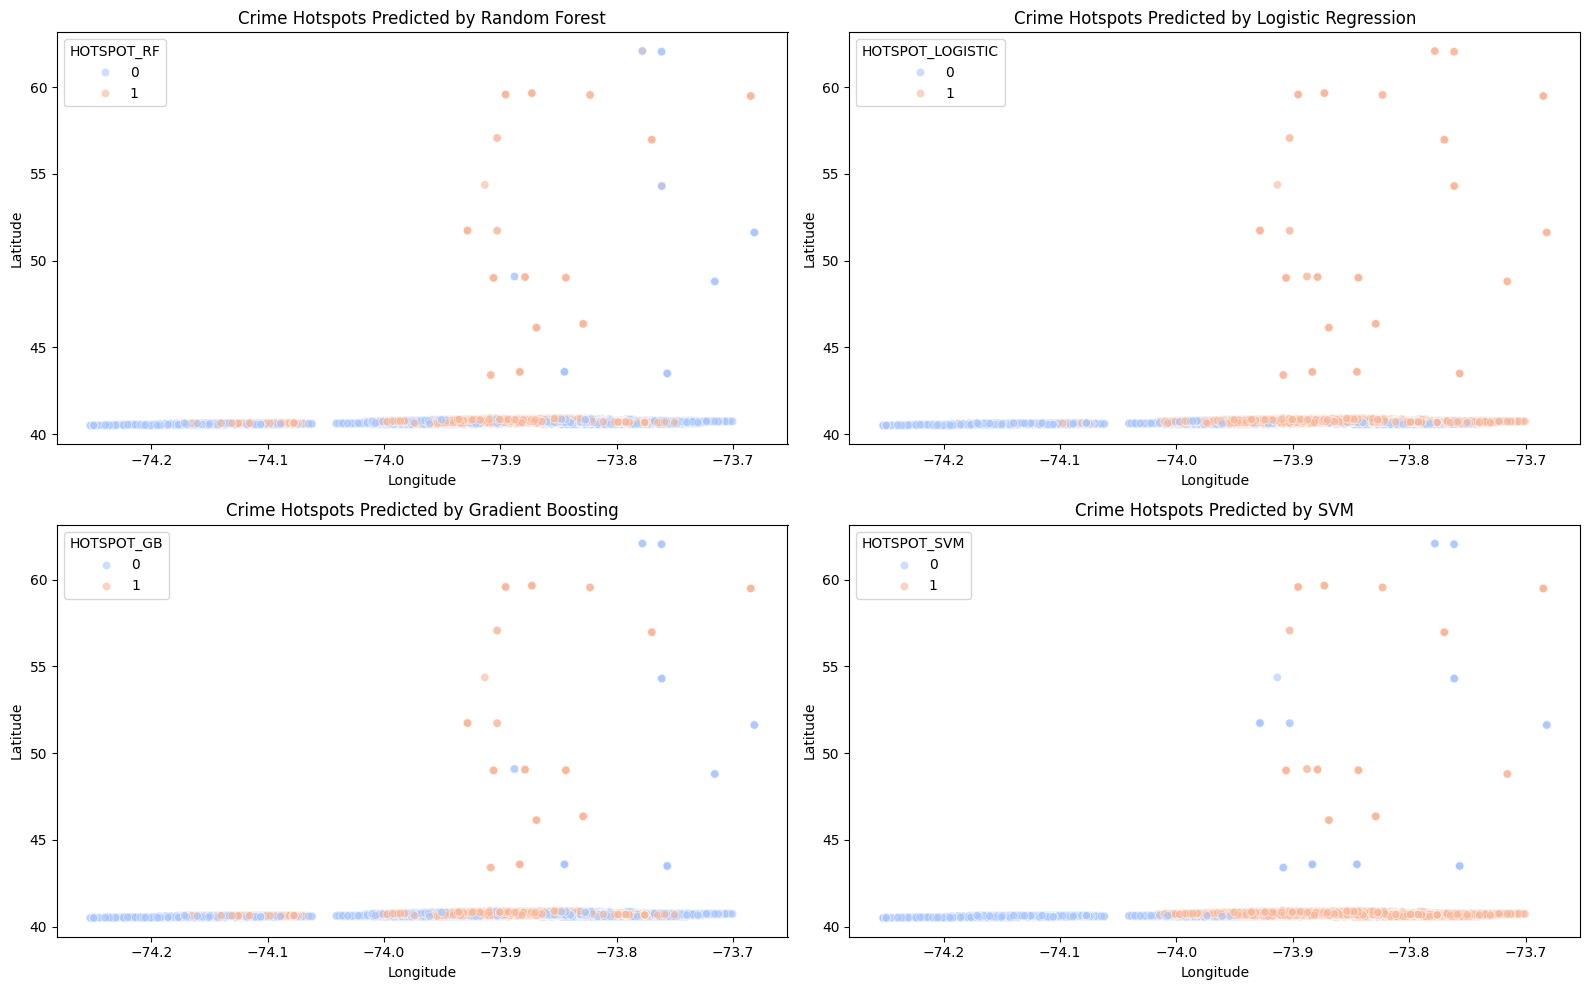

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

# Assuming 'data_encoded' is the dataset with predictions from all models

# Adding 'HOTSPOT_PREDICTION' columns to the dataset for each model's predictions

# Adding predictions from Random Forest model
data_encoded['HOTSPOT_RF'] = model.predict(X)

# Adding predictions from Logistic Regression model
data_encoded['HOTSPOT_LOGISTIC'] = logistic_model.predict(X)

# Adding predictions from Gradient Boosting model
data_encoded['HOTSPOT_GB'] = gb_model.predict(X)

# Adding predictions from SVM model
data_encoded['HOTSPOT_SVM'] = svm_model.predict(X)

# Error Metrics for all models
rf_report = classification_report(y, data_encoded['HOTSPOT_RF'])
logistic_report = classification_report(y, data_encoded['HOTSPOT_LOGISTIC'])
gb_report = classification_report(y, data_encoded['HOTSPOT_GB'])
svm_report = classification_report(y, data_encoded['HOTSPOT_SVM'])

print("Random Forest Classification Report:")
print(rf_report)
print("\nLogistic Regression Classification Report:")
print(logistic_report)
print("\nGradient Boosting Classification Report:")
print(gb_report)
print("\nSVM Classification Report:")
print(svm_report)

# Plotting heatmaps for the predicted hotspots
plt.figure(figsize=(16, 10))

# Plotting heatmap for Random Forest
plt.subplot(2, 2, 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='HOTSPOT_RF', data=data_encoded, palette='coolwarm', alpha=0.6)
plt.title('Crime Hotspots Predicted by Random Forest')

# Plotting heatmap for Logistic Regression
plt.subplot(2, 2, 2)
sns.scatterplot(x='Longitude', y='Latitude', hue='HOTSPOT_LOGISTIC', data=data_encoded, palette='coolwarm', alpha=0.6)
plt.title('Crime Hotspots Predicted by Logistic Regression')

# Plotting heatmap for Gradient Boosting
plt.subplot(2, 2, 3)
sns.scatterplot(x='Longitude', y='Latitude', hue='HOTSPOT_GB', data=data_encoded, palette='coolwarm', alpha=0.6)
plt.title('Crime Hotspots Predicted by Gradient Boosting')

# Plotting heatmap for SVM
plt.subplot(2, 2, 4)
sns.scatterplot(x='Longitude', y='Latitude', hue='HOTSPOT_SVM', data=data_encoded, palette='coolwarm', alpha=0.6)
plt.title('Crime Hotspots Predicted by SVM')

plt.tight_layout()
plt.show()

# Model Performance Metrics and Crime Hotspot Predictions

### Purpose:
This code evaluates the precision, recall, and F1-score for multiple models predicting crime hotspots and visualizes their performance metrics and predictions geographically.

---

### Steps:
#### Error Metrics Comparison:
1. **Calculate Metrics**:
   - Used `precision_recall_fscore_support` to compute weighted metrics (precision, recall, F1-score) for:
     - Random Forest
     - Logistic Regression
     - Gradient Boosting
     - SVM
2. **Organize Results**:
   - Stored the metrics in a DataFrame (`metrics_df`) for easier comparison:
     - Columns: `Precision`, `Recall`, `F1-Score`.

3. **Visualization**:
   - Created bar plots for each metric (Precision, Recall, F1-Score) to compare model performance:
     - **X-Axis**: Model names.
     - **Y-Axis**: Metric values (scaled between 0 and 1).
     - Used `sns.barplot()` with consistent color palettes.

---

#### Predicted Crime Hotspot Visualization:
1. **Add Model Predictions**:
   - Added columns to `data_encoded` for predicted hotspot labels from each model.

2. **Generate Heatmaps**:
   - Created scatter plots with:
     - **X-Axis**: Longitude.
     - **Y-Axis**: Latitude.
     - **Hue**: Predicted hotspot labels (1 for hotspot, 0 for non-hotspot).
   - Plotted separate scatter plots for:
     - Random Forest
     - Logistic Regression
     - Gradient Boosting
     - SVM
   - Used `sns.scatterplot()` with a `coolwarm` palette and transparency for clarity.

---

### Outputs:
1. **Bar Charts**:
   - Compare Precision, Recall, and F1-Score across models, highlighting their strengths and weaknesses.
2. **Heatmaps**:
   - Show geographical distributions of predicted hotspots for each model, enabling visual comparison of their spatial accuracy.

---

### Outcome:
The analysis highlights both the statistical and spatial performance of the models, helping identify the most effective algorithm for crime hotspot prediction. Visualizing predictions aids in understanding how well each model captures geographical patterns.


<ipython-input-16-c5583ef8da57>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
<ipython-input-16-c5583ef8da57>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
<ipython-input-16-c5583ef8da57>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=metrics_df, palette='viridis')


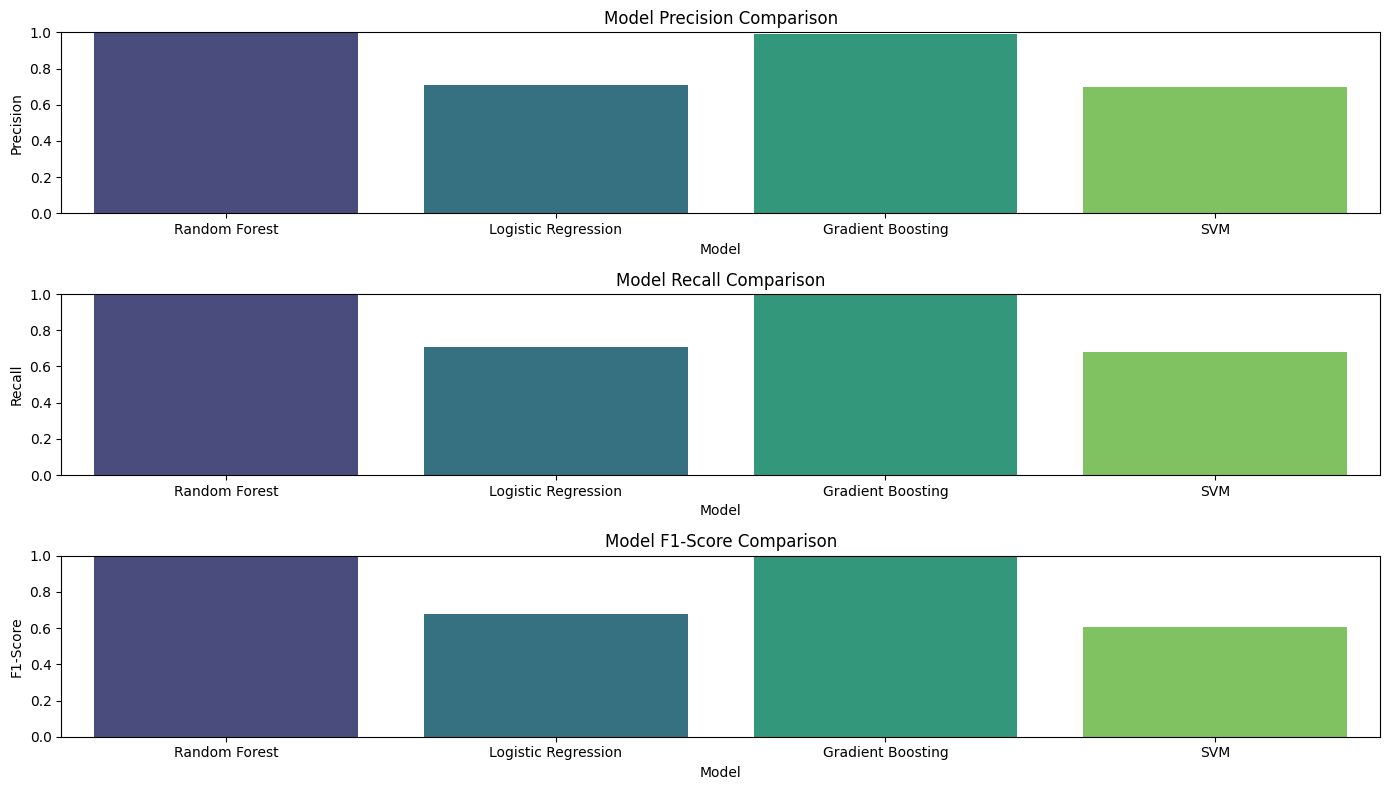

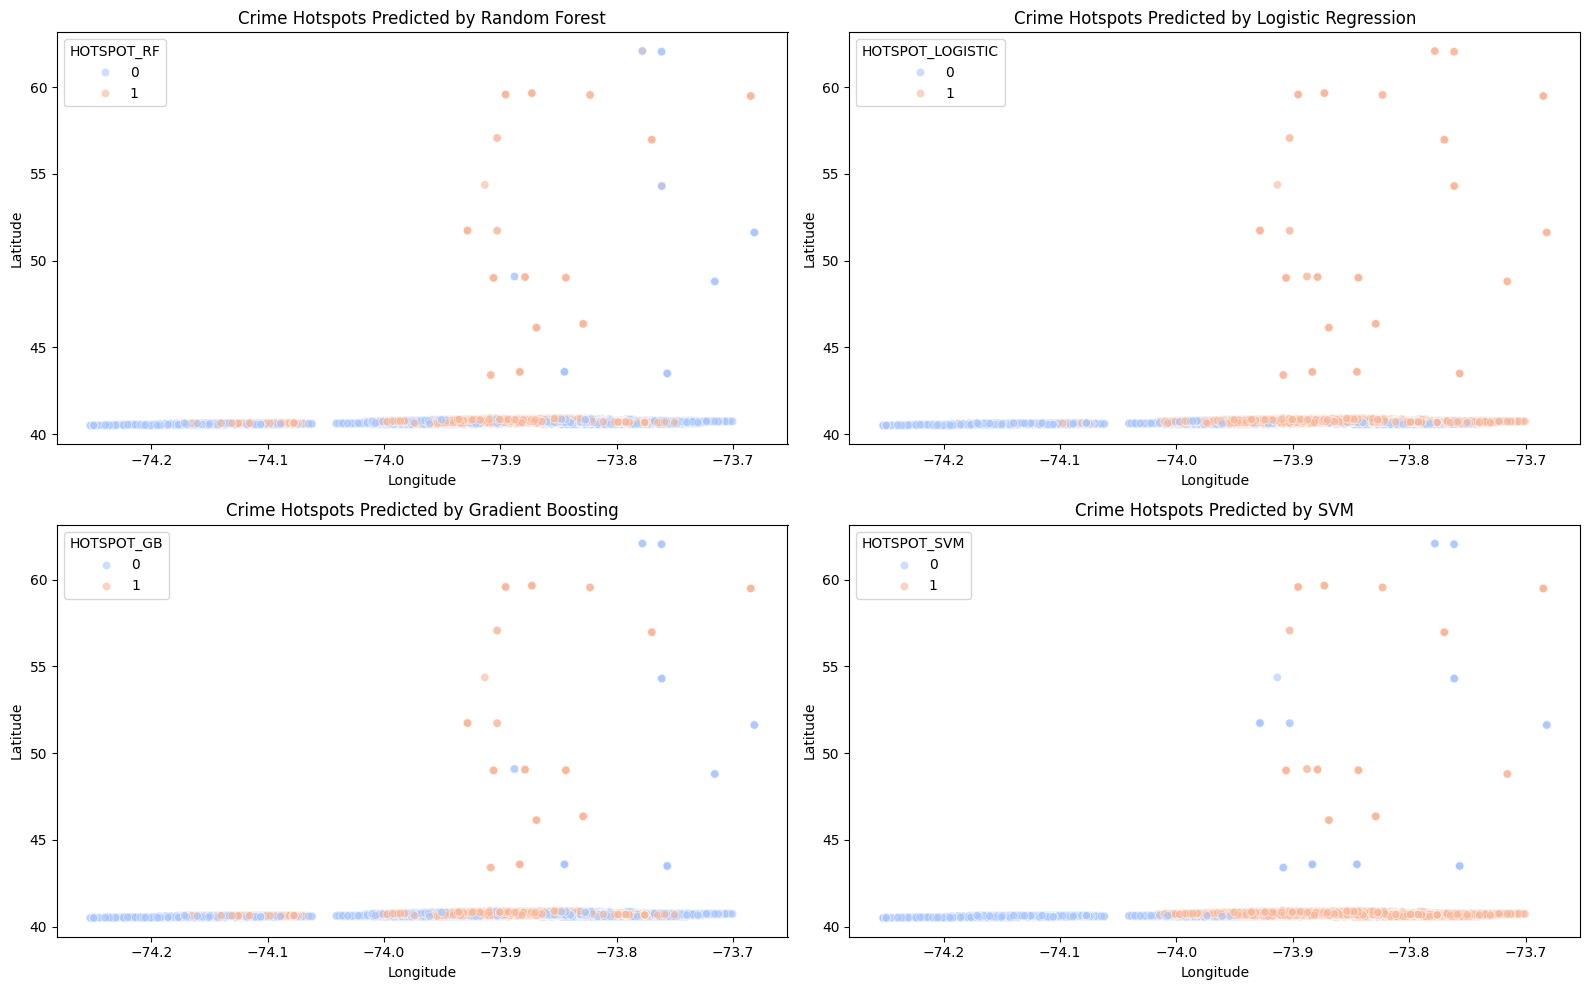

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Assuming 'data_encoded' is the dataset with predictions from all models

# Adding 'HOTSPOT_PREDICTION' columns to the dataset for each model's predictions

# Adding predictions from Random Forest model
data_encoded['HOTSPOT_RF'] = model.predict(X)

# Adding predictions from Logistic Regression model
data_encoded['HOTSPOT_LOGISTIC'] = logistic_model.predict(X)

# Adding predictions from Gradient Boosting model
data_encoded['HOTSPOT_GB'] = gb_model.predict(X)

# Adding predictions from SVM model
data_encoded['HOTSPOT_SVM'] = svm_model.predict(X)

# Error Metrics for all models
rf_report = precision_recall_fscore_support(y, data_encoded['HOTSPOT_RF'], average='weighted')
logistic_report = precision_recall_fscore_support(y, data_encoded['HOTSPOT_LOGISTIC'], average='weighted')
gb_report = precision_recall_fscore_support(y, data_encoded['HOTSPOT_GB'], average='weighted')
svm_report = precision_recall_fscore_support(y, data_encoded['HOTSPOT_SVM'], average='weighted')

# Creating a dataframe to store error metrics
metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Gradient Boosting', 'SVM'],
    'Precision': [rf_report[0], logistic_report[0], gb_report[0], svm_report[0]],
    'Recall': [rf_report[1], logistic_report[1], gb_report[1], svm_report[1]],
    'F1-Score': [rf_report[2], logistic_report[2], gb_report[2], svm_report[2]]
})

# Plotting the error metrics for comparison
plt.figure(figsize=(14, 8))

# Precision plot
plt.subplot(3, 1, 1)
sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
plt.title('Model Precision Comparison')
plt.ylim(0, 1)

# Recall plot
plt.subplot(3, 1, 2)
sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
plt.title('Model Recall Comparison')
plt.ylim(0, 1)

# F1-Score plot
plt.subplot(3, 1, 3)
sns.barplot(x='Model', y='F1-Score', data=metrics_df, palette='viridis')
plt.title('Model F1-Score Comparison')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Plotting heatmaps for the predicted hotspots
plt.figure(figsize=(16, 10))

# Plotting heatmap for Random Forest
plt.subplot(2, 2, 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='HOTSPOT_RF', data=data_encoded, palette='coolwarm', alpha=0.6)
plt.title('Crime Hotspots Predicted by Random Forest')

# Plotting heatmap for Logistic Regression
plt.subplot(2, 2, 2)
sns.scatterplot(x='Longitude', y='Latitude', hue='HOTSPOT_LOGISTIC', data=data_encoded, palette='coolwarm', alpha=0.6)
plt.title('Crime Hotspots Predicted by Logistic Regression')

# Plotting heatmap for Gradient Boosting
plt.subplot(2, 2, 3)
sns.scatterplot(x='Longitude', y='Latitude', hue='HOTSPOT_GB', data=data_encoded, palette='coolwarm', alpha=0.6)
plt.title('Crime Hotspots Predicted by Gradient Boosting')

# Plotting heatmap for SVM
plt.subplot(2, 2, 4)
sns.scatterplot(x='Longitude', y='Latitude', hue='HOTSPOT_SVM', data=data_encoded, palette='coolwarm', alpha=0.6)
plt.title('Crime Hotspots Predicted by SVM')

plt.tight_layout()
plt.show()

In [ ]:
## Newdata

In [ ]:
X_new.columns

Index(['ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD', 'ARREST_YEAR',
       'ARREST_MONTH', 'ARREST_DAY', 'ARREST_WEEKDAY', 'ARREST_BORO_K',
       'ARREST_BORO_M', 'ARREST_BORO_Q',
       ...
       'OFNS_DESC_UNAUTHORIZED USE OF A VEHICLE 3 (UUV)',
       'OFNS_DESC_UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS',
       'OFNS_DESC_VEHICLE AND TRAFFIC LAWS',
       'PERP_RACE_ASIAN / PACIFIC ISLANDER', 'PERP_RACE_BLACK',
       'PERP_RACE_BLACK HISPANIC', 'PERP_RACE_OTHER', 'PERP_RACE_UNKNOWN',
       'PERP_RACE_WHITE', 'PERP_RACE_WHITE HISPANIC'],
      dtype='object', length=101)

In [ ]:
model

RandomForestClassifier(random_state=42)

# Preparing and Analyzing a New Dataset for Crime Hotspot Prediction

### Purpose:
This code processes a new dataset to ensure compatibility with the trained model's structure and prepares it for crime hotspot prediction.

---

### Steps:
1. **Load and Inspect Dataset**:
   - Loaded the new dataset from `/content/drive/My Drive/Colab Notebooks/Prediction_data_2.csv`.
   - Checked for missing values to identify potential data cleaning needs.

2. **Date Feature Engineering**:
   - Converted `ARREST_DATE` to datetime format.
   - Extracted temporal features:
     - **`ARREST_YEAR`**: Year of the arrest.
     - **`ARREST_MONTH`**: Month of the arrest.
     - **`ARREST_DAY`**: Day of the month.
     - **`ARREST_WEEKDAY`**: Day of the week (0 = Monday, 6 = Sunday).

3. **One-Hot Encoding**:
   - Encoded categorical features (`OFNS_DESC`, `ARREST_BORO`, `PERP_RACE`) using one-hot encoding.

4. **Ensure Feature Compatibility**:
   - Matched the structure of the new dataset with the training dataset:
     - Added missing columns with default values (0) to match training data features.
     - Reordered columns to align with the training dataset.

5. **Select Features**:
   - Defined the feature set (`X_new`) for prediction, ensuring it matches the trained model's structure.

6. **Define Target Variable**:
   - Determined hotspots using the threshold:
     - Precincts with a crime count above the average are labeled as hotspots (`HOTSPOT=1`).
     - Precincts below the average are labeled as non-hotspots (`HOTSPOT=0`).

7. **Preview Datasets**:
   - Displayed the first few rows of the feature dataset (`X_new`) and the target variable (`y_actual`).

---

### Outputs:
1. **`X_new`**: Preprocessed feature set ready for prediction.
2. **`y_actual`**: Binary labels for hotspots, enabling evaluation against predictions.

### Outcome:
The new dataset is prepared and aligned with the trained model's structure, allowing for seamless prediction and evaluation of crime hotspots.


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the new dataset
new_data_path = '/content/drive/My Drive/Colab Notebooks/Prediction_data_2.csv'
new_data = pd.read_csv(new_data_path)

# Checking for missing values in the dataset
missing_values = new_data.isnull().sum()
# Converting 'ARREST_DATE' to datetime format
data_cleaned['ARREST_DATE'] = pd.to_datetime(data_cleaned['ARREST_DATE'])

# Extracting year, month, day, and weekday from 'ARREST_DATE'
data_cleaned['ARREST_YEAR'] = data_cleaned['ARREST_DATE'].dt.year
data_cleaned['ARREST_MONTH'] = data_cleaned['ARREST_DATE'].dt.month
data_cleaned['ARREST_DAY'] = data_cleaned['ARREST_DATE'].dt.day
data_cleaned['ARREST_WEEKDAY'] = data_cleaned['ARREST_DATE'].dt.weekday

# Making a copy to avoid warnings
data_cleaned_2 = data_cleaned.copy()

# Using one-hot encoding for categorical features like 'OFNS_DESC', 'ARREST_BORO', and 'PERP_RACE'
categorical_features = ['OFNS_DESC', 'ARREST_BORO', 'PERP_RACE']
data_encoded_2 = pd.get_dummies(data_cleaned_2, columns=categorical_features, drop_first=True)

# Ensure that the new dataset matches the training set feature structure
# Adding missing columns that were in the training dataset but not in the new dataset
training_columns = list(data_encoded.columns)  # Assume 'data_encoded' was the training dataset after preprocessing
for column in training_columns:
    if column not in data_encoded_2.columns:
        data_encoded_2[column] = 0  # Adding missing column with value 0

# Ensure the columns in the new dataset are in the same order as the training dataset
data_encoded_2 = data_encoded_2.reindex(columns=training_columns, fill_value=0)

# Selecting features for crime hotspot prediction
features = [
    'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD', 'ARREST_YEAR',
    'ARREST_MONTH', 'ARREST_DAY', 'ARREST_WEEKDAY'
] + list(data_encoded_2.columns.difference(data_cleaned_2.columns))
X_new = data_encoded_2[features]
# Defining the target variable: Identifying hotspots
# Assuming precincts with high counts of incidents are hotspots; label precincts as hotspot (1) or not (0)
precinct_crime_counts = data_encoded_2['ARREST_PRECINCT'].value_counts()
hotspot_threshold = precinct_crime_counts.mean()  # Hotspots are precincts above the average number of crimes
data_encoded_2['HOTSPOT'] = data_encoded_2['ARREST_PRECINCT'].apply(lambda x: 1 if precinct_crime_counts[x] > hotspot_threshold else 0)

y_actual = data_encoded_2['HOTSPOT']

# Displaying the feature and target datasets
print(X_new.head())
print(y_actual.head())

   ARREST_PRECINCT  X_COORD_CD  Y_COORD_CD  ARREST_YEAR  ARREST_MONTH  \
0               25   1002065.0    231446.0         2007             6   
1               79    996878.0    189261.0         2008             6   
2               73   1007685.0    189129.0         2008             8   
3               70    995603.0    164474.0         2016             6   
4                9    987184.0    205840.0         2015            10   

   ARREST_DAY  ARREST_WEEKDAY  ARREST_BORO_K  ARREST_BORO_M  ARREST_BORO_Q  \
0          15               4          False           True          False   
1          19               3           True          False          False   
2           6               2           True          False          False   
3           4               5           True          False          False   
4          30               4          False           True          False   

   ...  OFNS_DESC_UNAUTHORIZED USE OF A VEHICLE 3 (UUV)  \
0  ...                           

<ipython-input-34-b2bb64a66eb2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['ARREST_DATE'] = pd.to_datetime(data_cleaned['ARREST_DATE'])
<ipython-input-34-b2bb64a66eb2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['ARREST_YEAR'] = data_cleaned['ARREST_DATE'].dt.year
<ipython-input-34-b2bb64a66eb2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

# Evaluating Random Forest and Gradient Boosting Models on a New Dataset

### Purpose:
This code ensures the correct feature selection for a new dataset, applies the trained models (Random Forest and Gradient Boosting) to predict hotspots, and evaluates their performance.

---

### Steps:
1. **Correct Feature Selection**:
   - Defined `training_features` to include only the columns used during model training.
   - Explicitly selected these features from the new dataset (`data_encoded_2`) to create `X_new`.
   - Dropped any additional columns (e.g., `HOTSPOT`, model-specific predictions) to prevent leakage.

2. **Predictions**:
   - Used the trained Random Forest (`model`) and Gradient Boosting (`gb_model`) models to predict hotspot labels on the new dataset (`X_new`).

3. **Model Evaluation**:
   - Evaluated each model's performance using:
     - **Accuracy**: Proportion of correctly classified samples.
     - **Classification Report**: Detailed metrics including precision, recall, F1-score, and support.
     - **Confusion Matrix**: Breakdown of true positives, true negatives, false positives, and false negatives.

---

### Outputs:
#### Random Forest Model:
- **Accuracy**: Displays the proportion of correct predictions.
- **Classification Report**:
  - Precision, recall, F1-score, and support for each class (`HOTSPOT=1` and `HOTSPOT=0`).
- **Confusion Matrix**:
  - Provides a detailed view of correct and incorrect predictions.

#### Gradient Boosting Model:
- **Accuracy**: Similar metric for the Gradient Boosting model.
- **Classification Report**: Detailed performance metrics for Gradient Boosting.
- **Confusion Matrix**: Insight into the distribution of prediction errors.

---

### Outcome:
This process validates the Random Forest and Gradient Boosting models on the new dataset, ensuring their robustness in predicting crime hotspots. The evaluation metrics provide detailed insights into model performance and areas for potential improvement.


In [ ]:
# Correct Feature Selection

# Define the columns that were used during training
training_features = [
    'ARREST_PRECINCT', 'X_COORD_CD', 'Y_COORD_CD', 'ARREST_YEAR',
    'ARREST_MONTH', 'ARREST_DAY', 'ARREST_WEEKDAY'
] + list(data_encoded.columns.difference(data_cleaned.columns))

# Create X_new by explicitly including only the training features and excluding any additional columns
X_new = data_encoded_2[training_features].copy()

# If there are any remaining columns from the predictions, drop them
columns_to_drop = ['HOTSPOT', 'HOTSPOT_RF', 'HOTSPOT_LOGISTIC', 'HOTSPOT_GB', 'HOTSPOT_SVM']
X_new = X_new.drop(columns=[col for col in columns_to_drop if col in X_new.columns], errors='ignore')

# Now use the trained models to predict
# Predictions using Random Forest model
y_pred_rf = model.predict(X_new)

# Predictions using Gradient Boosting model
y_pred_gb = gb_model.predict(X_new)

# Evaluate Random Forest model
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_actual, y_pred_rf))
print("Classification Report:\n", classification_report(y_actual, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_actual, y_pred_rf))

# Evaluate Gradient Boosting model
print("\nGradient Boosting Model Evaluation:")
print("Accuracy:", accuracy_score(y_actual, y_pred_gb))
print("Classification Report:\n", classification_report(y_actual, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_actual, y_pred_gb))


Random Forest Model Evaluation:
Accuracy: 0.985795852950015
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     18891
           1       0.98      1.00      0.99     31024

    accuracy                           0.99     49915
   macro avg       0.99      0.98      0.98     49915
weighted avg       0.99      0.99      0.99     49915

Confusion Matrix:
 [[18204   687]
 [   22 31002]]

Gradient Boosting Model Evaluation:
Accuracy: 0.9809476109385956
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     18891
           1       0.97      1.00      0.98     31024

    accuracy                           0.98     49915
   macro avg       0.98      0.98      0.98     49915
weighted avg       0.98      0.98      0.98     49915

Confusion Matrix:
 [[17963   928]
 [   23 31001]]


In [ ]:
print(X.shape)

(49915, 101)


In [ ]:
print(X_new.shape)

(49915, 101)


# Model Performance Analysis and Visualization for New Dataset

### Purpose:
This code evaluates and visualizes the performance of Random Forest and Gradient Boosting models on a new dataset, focusing on key error metrics and confusion matrices.

---

### Steps:
#### Error Metrics:
1. **Calculate Metrics**:
   - Used `precision_recall_fscore_support` to compute weighted metrics (Precision, Recall, F1-Score) for:
     - **Random Forest**: Predictions stored in `y_pred_rf`.
     - **Gradient Boosting**: Predictions stored in `y_pred_gb`.
   - Calculated accuracy for both models using `accuracy_score`.

2. **Organize Results**:
   - Stored the metrics in a DataFrame (`metrics_df`) for easier comparison:
     - **Columns**: `Precision`, `Recall`, `F1-Score`, `Accuracy`.

3. **Visualization**:
   - Created bar plots for each metric (Precision, Recall, F1-Score, Accuracy) to compare model performance:
     - **X-Axis**: Model names.
     - **Y-Axis**: Metric values (scaled between 0 and 1).

---

#### Confusion Matrices:
1. **Generate Confusion Matrices**:
   - Calculated confusion matrices for:
     - Random Forest predictions (`y_pred_rf`).
     - Gradient Boosting predictions (`y_pred_gb`).

2. **Visualization**:
   - Used `sns.heatmap()` to create heatmaps of the confusion matrices:
     - **Values Annotated**: True positives, true negatives, false positives, false negatives.
     - Color-coded matrices for easy interpretation:
       - **Blues**: Random Forest.
       - **Reds**: Gradient Boosting.

---

### Outputs:
#### Error Metrics:
- Bar plots comparing Precision, Recall, F1-Score, and Accuracy for both models.

#### Confusion Matrices:
- Heatmaps showing the detailed breakdown of prediction results for Random Forest and Gradient Boosting models.

---

### Outcome:
The visualizations highlight the strengths and weaknesses of each model in predicting crime hotspots, providing both statistical and detailed error insights. These results help in selecting the best-performing model and understanding its behavior on the new dataset.


<ipython-input-42-2b1502640749>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
<ipython-input-42-2b1502640749>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
<ipython-input-42-2b1502640749>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=metrics_df, palette='viridis')
<ipython-input-42-2b1502640749>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

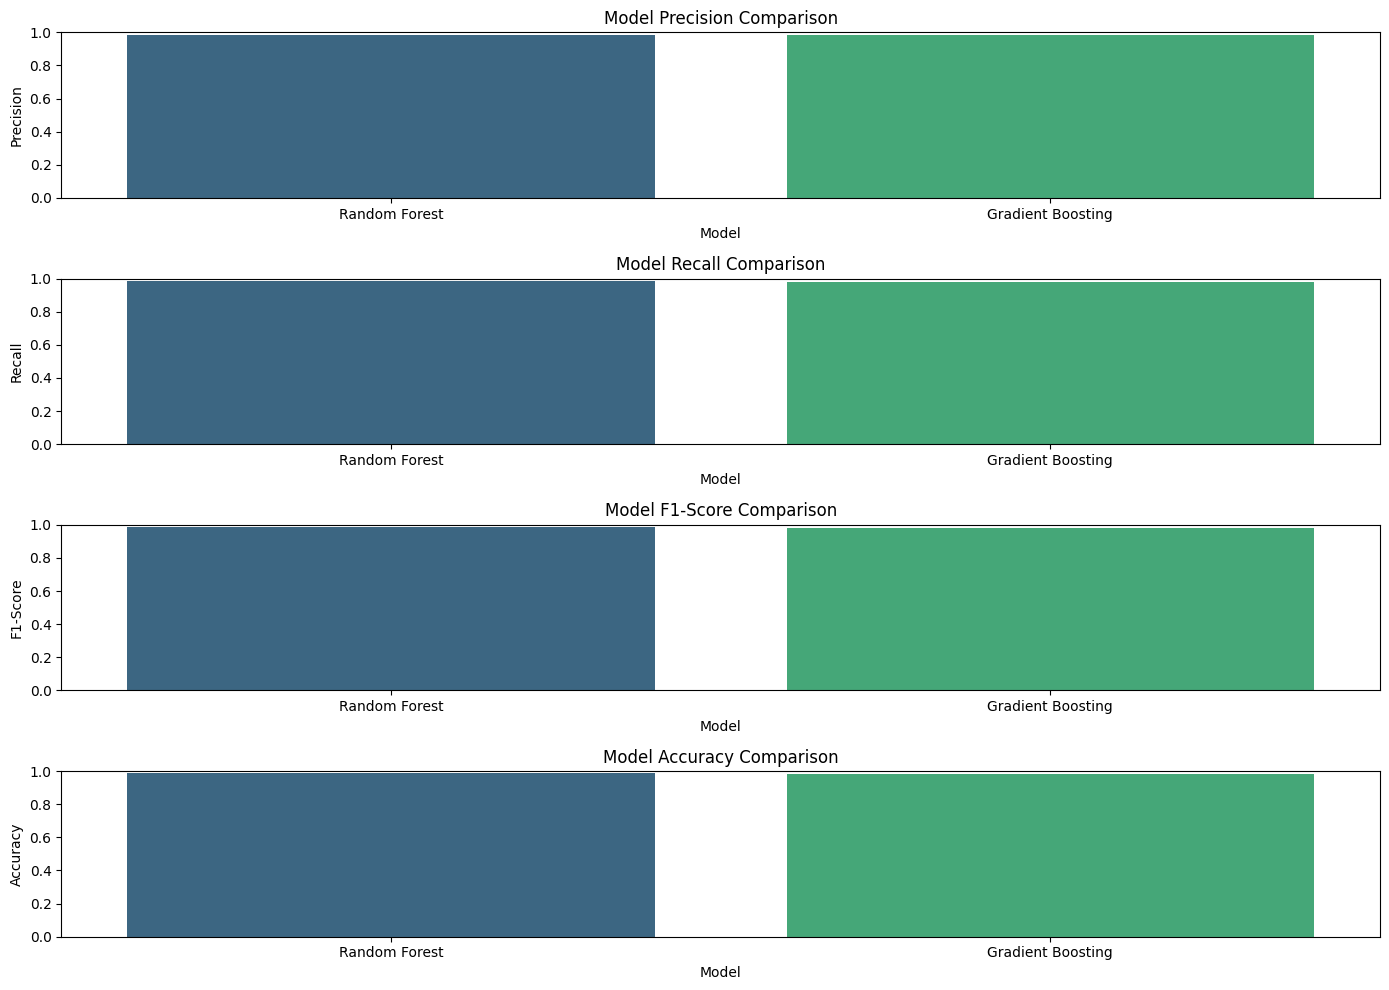

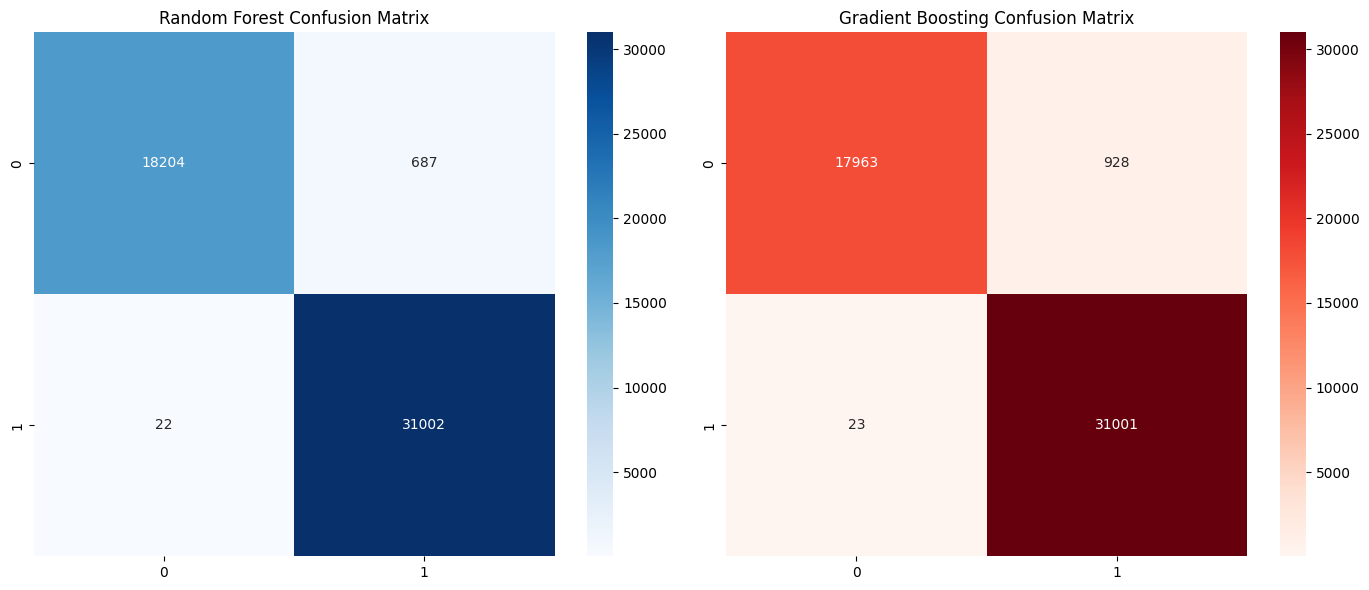

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix

# Assuming 'data_encoded_2' is the new dataset with actual labels ('y_actual') and predictions from the models

# Error Metrics for Random Forest and Gradient Boosting models
y_pred_rf = model.predict(X_new)
y_pred_gb = gb_model.predict(X_new)

# Creating a dataframe to store error metrics for Random Forest and Gradient Boosting
rf_report = precision_recall_fscore_support(y_actual, y_pred_rf, average='weighted')
gb_report = precision_recall_fscore_support(y_actual, y_pred_gb, average='weighted')

metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Precision': [rf_report[0], gb_report[0]],
    'Recall': [rf_report[1], gb_report[1]],
    'F1-Score': [rf_report[2], gb_report[2]],
    'Accuracy': [accuracy_score(y_actual, y_pred_rf), accuracy_score(y_actual, y_pred_gb)]
})

# Plotting the error metrics for comparison
plt.figure(figsize=(14, 10))

# Precision plot
plt.subplot(4, 1, 1)
sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
plt.title('Model Precision Comparison')
plt.ylim(0, 1)

# Recall plot
plt.subplot(4, 1, 2)
sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
plt.title('Model Recall Comparison')
plt.ylim(0, 1)

# F1-Score plot
plt.subplot(4, 1, 3)
sns.barplot(x='Model', y='F1-Score', data=metrics_df, palette='viridis')
plt.title('Model F1-Score Comparison')
plt.ylim(0, 1)

# Accuracy plot
plt.subplot(4, 1, 4)
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Confusion Matrix Visualization for Random Forest and Gradient Boosting
plt.figure(figsize=(14, 6))

# Confusion Matrix for Random Forest
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_actual, y_pred_rf), annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Confusion Matrix')

# Confusion Matrix for Gradient Boosting
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_actual, y_pred_gb), annot=True, cmap='Reds', fmt='g')
plt.title('Gradient Boosting Confusion Matrix')

plt.tight_layout()
plt.show()

# Model Performance Metrics and Visualization for Random Forest and Gradient Boosting

### Purpose:
This code evaluates and visualizes the performance of Random Forest and Gradient Boosting models on a new dataset using statistical metrics, bar plots, and confusion matrices.

---

### Steps:

#### Error Metrics:
1. **Calculate Metrics**:
   - Used `precision_recall_fscore_support` to compute weighted Precision, Recall, and F1-Score.
   - Calculated Accuracy for both Random Forest and Gradient Boosting models.

2. **Organize Metrics**:
   - Compiled the metrics into a DataFrame (`metrics_df`) with columns:
     - **Precision**, **Recall**, **F1-Score**, and **Accuracy** for each model.

3. **Plot Metrics**:
   - Created bar plots for each metric using `sns.barplot`:
     - **X-Axis**: Model names.
     - **Y-Axis**: Metric values (scaled between 0 and 1).
     - Separate plots for Precision, Recall, F1-Score, and Accuracy.

---

#### Confusion Matrices:
1. **Generate Confusion Matrices**:
   - Used `confusion_matrix` to calculate true positives, true negatives, false positives, and false negatives.

2. **Visualize Matrices**:
   - Created heatmaps with `sns.heatmap` for:
     - **Random Forest**: Heatmap with the `Blues` color palette.
     - **Gradient Boosting**: Heatmap with the `Reds` color palette.

---

### Outputs:

#### Error Metrics:
- **Bar Plots**: Show comparative metrics (Precision, Recall, F1-Score, Accuracy) for both models.

#### Confusion Matrices:
- **Heatmaps**: Provide a detailed breakdown of prediction results for Random Forest and Gradient Boosting models.

---

### Outcome:
The bar plots highlight the statistical strengths of each model, while the confusion matrices provide detailed insights into classification performance. Together, these visualizations enable a comprehensive evaluation of both models' effectiveness on the new dataset.


<ipython-input-54-3fa68d5f004a>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
<ipython-input-54-3fa68d5f004a>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
<ipython-input-54-3fa68d5f004a>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=metrics_df, palette='viridis')
<ipython-input-54-3fa68d5f004a>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

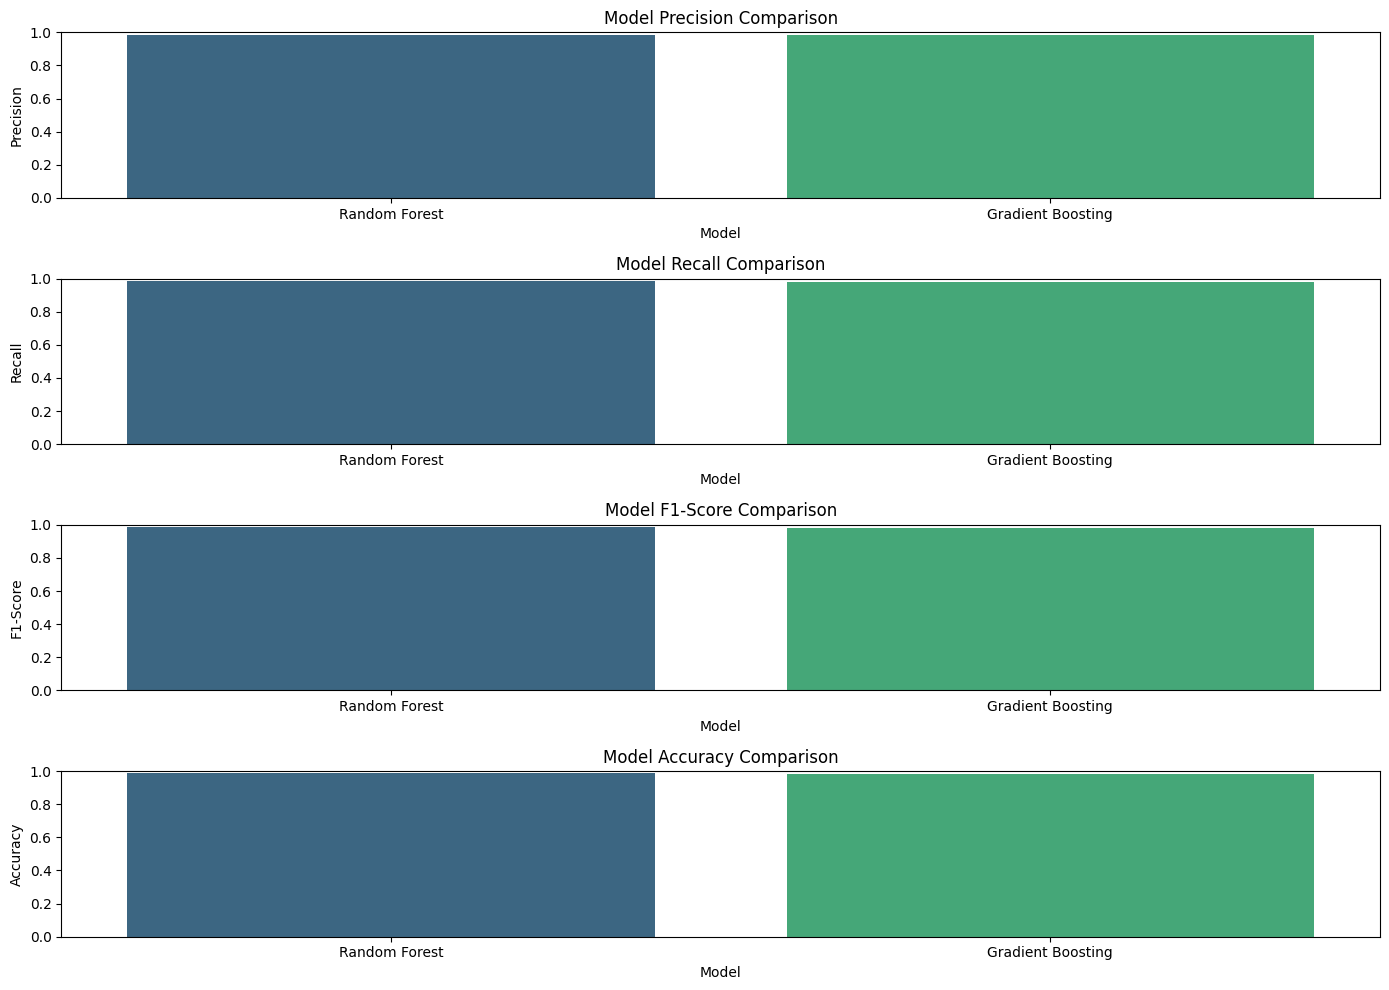

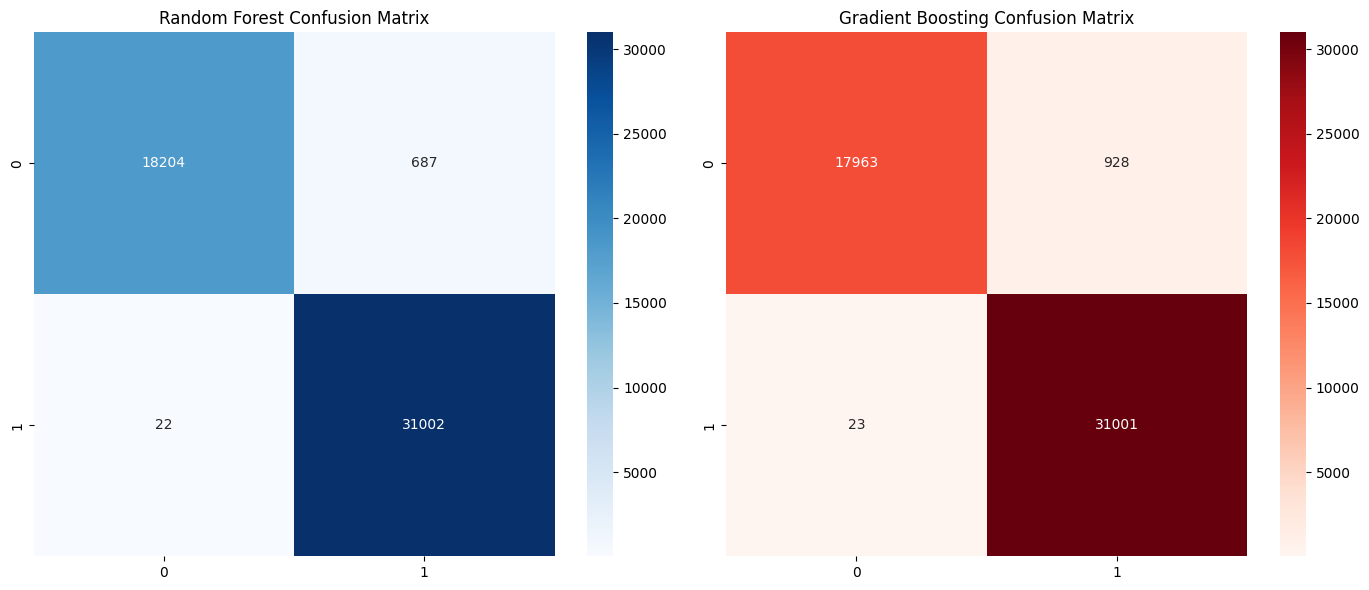

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix

# Assuming 'data_encoded_2' is the new dataset with actual labels ('y_actual') and predictions from the models

# Error Metrics for Random Forest and Gradient Boosting models
y_pred_rf = model.predict(X_new)
y_pred_gb = gb_model.predict(X_new)

# Creating a dataframe to store error metrics for Random Forest and Gradient Boosting
rf_report = precision_recall_fscore_support(y_actual, y_pred_rf, average='weighted')
gb_report = precision_recall_fscore_support(y_actual, y_pred_gb, average='weighted')

metrics_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Precision': [rf_report[0], gb_report[0]],
    'Recall': [rf_report[1], gb_report[1]],
    'F1-Score': [rf_report[2], gb_report[2]],
    'Accuracy': [accuracy_score(y_actual, y_pred_rf), accuracy_score(y_actual, y_pred_gb)]
})

# Plotting the error metrics for comparison
plt.figure(figsize=(14, 10))

# Precision plot
plt.subplot(4, 1, 1)
sns.barplot(x='Model', y='Precision', data=metrics_df, palette='viridis')
plt.title('Model Precision Comparison')
plt.ylim(0, 1)

# Recall plot
plt.subplot(4, 1, 2)
sns.barplot(x='Model', y='Recall', data=metrics_df, palette='viridis')
plt.title('Model Recall Comparison')
plt.ylim(0, 1)

# F1-Score plot
plt.subplot(4, 1, 3)
sns.barplot(x='Model', y='F1-Score', data=metrics_df, palette='viridis')
plt.title('Model F1-Score Comparison')
plt.ylim(0, 1)

# Accuracy plot
plt.subplot(4, 1, 4)
sns.barplot(x='Model', y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Confusion Matrix Visualization for Random Forest and Gradient Boosting
plt.figure(figsize=(14, 6))

# Confusion Matrix for Random Forest
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_actual, y_pred_rf), annot=True, cmap='Blues', fmt='g')
plt.title('Random Forest Confusion Matrix')

# Confusion Matrix for Gradient Boosting
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_actual, y_pred_gb), annot=True, cmap='Reds', fmt='g')
plt.title('Gradient Boosting Confusion Matrix')

plt.tight_layout()
plt.show()



# Visualizing Predicted Crime Hotspots on a Geographical Map

### Purpose:
This code uses Folium to visualize crime hotspot predictions from Random Forest and Gradient Boosting models on a geographical map, providing spatial insights into model predictions.

---

### Steps:

#### 1. Filter Hotspot Predictions:
- **Random Forest**:
  - Extracted rows where the predicted label is a hotspot (`HOTSPOT=1`) from the `y_pred_rf` predictions.
- **Gradient Boosting**:
  - Extracted rows where the predicted label is a hotspot (`HOTSPOT=1`) from the `y_pred_gb` predictions.

#### 2. Create a Base Map:
- Calculated the map's center using the mean Latitude and Longitude of the dataset.
- Created a Folium map centered on the computed coordinates with a zoom level of 12.

#### 3. Add Heatmaps:
- **Random Forest Hotspots**:
  - Used `HeatMap` to overlay hotspot locations with a default blur setting of 15.
- **Gradient Boosting Hotspots**:
  - Used `HeatMap` with a custom gradient to visually distinguish high-density areas:
    - Orange for medium density.
    - Red for higher density.
    - Dark red for the highest density.

#### 4. Add Interactivity:
- Enabled layer toggling with `folium.LayerControl()` to switch between Random Forest and Gradient Boosting hotspot views.

#### 5. Save Map:
- The map can be saved as an HTML file for viewing in a browser or embedding into reports.

---

### Output:
The resulting interactive map:
1. Highlights predicted crime hotspots for both models using heatmaps.
2. Allows users to toggle between the Random Forest and Gradient Boosting predictions for comparison.
3. Provides a dynamic geographical representation of model predictions, aiding in crime analysis and decision-making.

### How to View:
- Open the saved HTML file in any browser to interact with the map.


In [ ]:
# Visualize Hotspot Predictions on a Geographical Map
# Get Latitude and Longitude of predictions labeled as hotspots
hotspot_rf = data_encoded_2[y_pred_rf == 1]
hotspot_gb = data_encoded_2[y_pred_gb == 1]

# Create a base map
map_center = [data_encoded_2['Latitude'].mean(), data_encoded_2['Longitude'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=12)

# Add predicted hotspots to the map using Random Forest predictions
heat_data_rf = [[row['Latitude'], row['Longitude']] for index, row in hotspot_rf.iterrows()]
HeatMap(heat_data_rf, name='Random Forest Hotspots',blur=15).add_to(crime_map)

# Add predicted hotspots to the map using Gradient Boosting predictions
heat_data_gb = [[row['Latitude'], row['Longitude']] for index, row in hotspot_gb.iterrows()]
HeatMap(heat_data_gb, name='Gradient Boosting Hotspots',blur=15, gradient={0.70: 'orange', 0.2: 'red', 1: 'darkred'}).add_to(crime_map)

# Add layer control to toggle between Random Forest and Gradient Boosting heatmaps
folium.LayerControl().add_to(crime_map)

# Save map to HTML file
crime_map